# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#libraries for Data manipulation
import numpy as np
import pandas as pd

In [ ]:
#Data Visualization libs
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#enable display
%matplotlib inline

In [ ]:
#predication model libs
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
#algorthims
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics


In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV


Import Dataset


In [ ]:
#import csv file and copy
data = pd.read_csv('/content/drive/MyDrive/ExtraaLearn.csv')

In [ ]:
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# returns the first 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# View the last 5 rows of the dataset
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
# view of the shape of the data
df.shape

(4612, 15)

observation: The dataset has 4612 rows and 15 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:

age, website_visits, time_spent_on_website, page_views_per_visit, and status are of numeric type and the remainder of the columns are of objects. We will have to create dummy encoding for object columns of the model.
The number of non-null values is 4612, that is same as the total number of entries in the data, i.e., there are no null values. The column ID is an identifier for lead in the data. This column will not help with our analysis.

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [ ]:
num_col= df.select_dtypes('number').columns
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


Observations:

age - Average age of the lead is 46. The most young being 18 and the oldest being 63. 50% being around 51 years old.
website_visits - Average number of visits is 3.5. There is a large difference between 75th percentile and max indicating there could be an outlier.

time_spent_on_website - Time spent ranges from 0-2537s (0-42min).

page_views_per_visit - Average page views is 3. There is a large gap between 75th percentile and max indicating there could be an outlier, or a very pracousious lead.

status - Over 75% of the leads are not likely to convert.

In [ ]:
# create catogrial variables via python lists
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print(round(100*df[column].value_counts()/len(df),2))
    print("-" * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
ID
EXT001     0.02
EXT2884    0.02
EXT3080    0.02
EXT3079    0.02
EXT3078    0.02
           ... 
EXT1537    0.02
EXT1536    0.02
EXT1535    0.02
EXT1534    0.02
EXT4612    0.02
Name: count, Length: 4612, dtype: float64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
current_occupation
Professional    56.72
Unemployed      31.24
Student         12.03
Name: count, dtype: float64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
first_interaction
Website       55.12
Mobile App    44.88
Name: count, dtype: float64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low

Observations:

The number of working professionals  is 2616.
The majority 55.12% of the leads interacted with ExtraaLearn from the website.
close to an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively. Only 2.3% of the profile completions are categorized as low. About 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This means that the majority of the leads  may prefer to communicate via email. *It is observable that each ID has an equal percentage of values. Now we check the number of unique values in the ID column.

In [ ]:
# number of unique values check
df["ID"].nunique()

4612

As expected, All the values in the ID column are unique. We can drop this column as it would not add value to our analysis.

In [ ]:
# Dropping ID column
df.drop(["ID"], axis = 1, inplace = True)

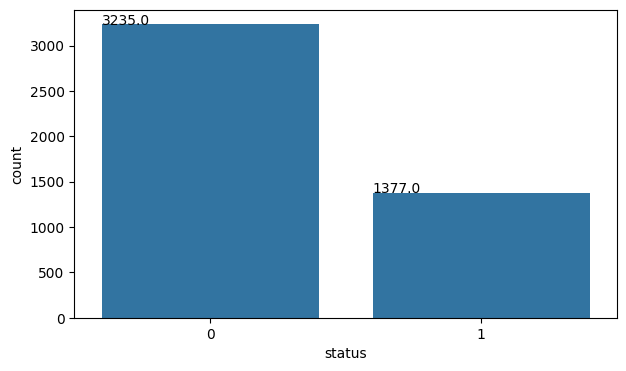

In [ ]:
plt.figure(figsize = (7, 4))

plots = sns.countplot(x = 'status', data = df)

# Annotating the exact count on the top of the bar for each category
for p in plots.patches:
    plots.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height())
                        )

The above plot shows that number of leads converted are significantly less than number of leads not converted.
The plot indicates that ~30%  or (1377/4612) of leads have been converted.

Distribution and outliers for numerical columns in the data

age
Skew : -0.72


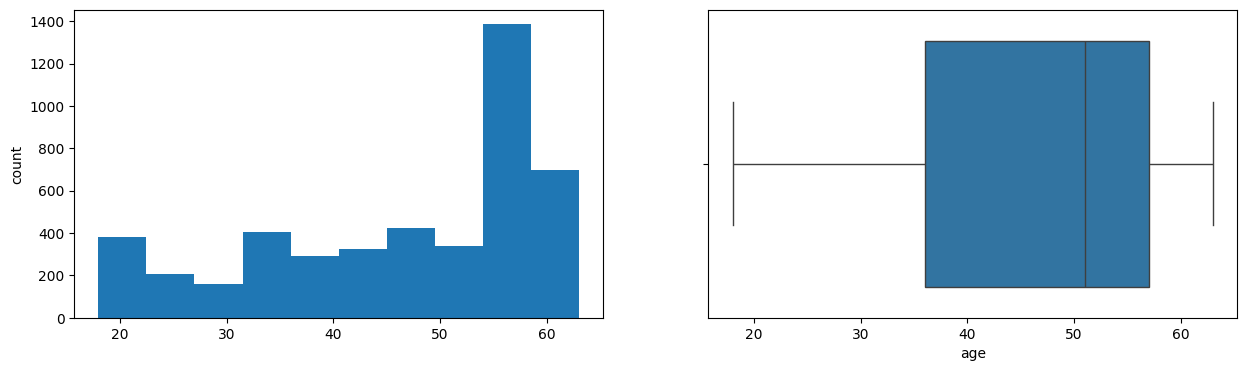

website_visits
Skew : 2.16


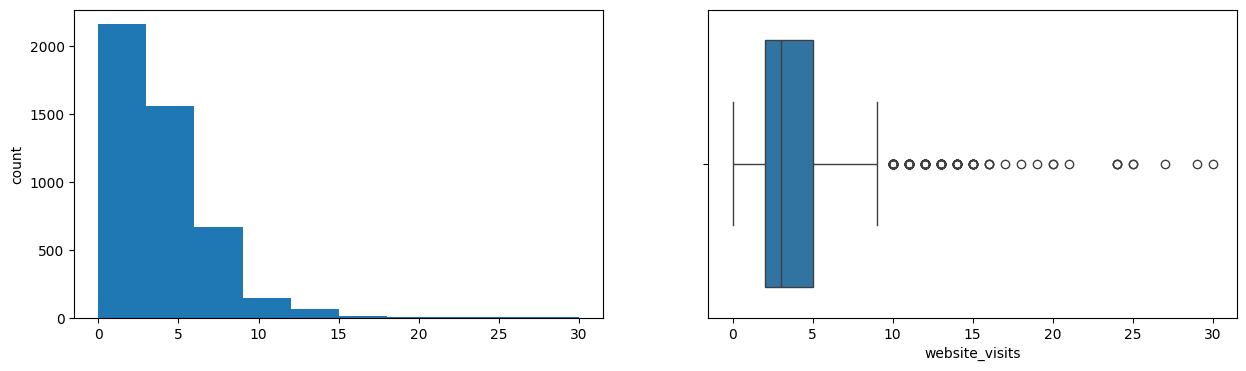

time_spent_on_website
Skew : 0.95


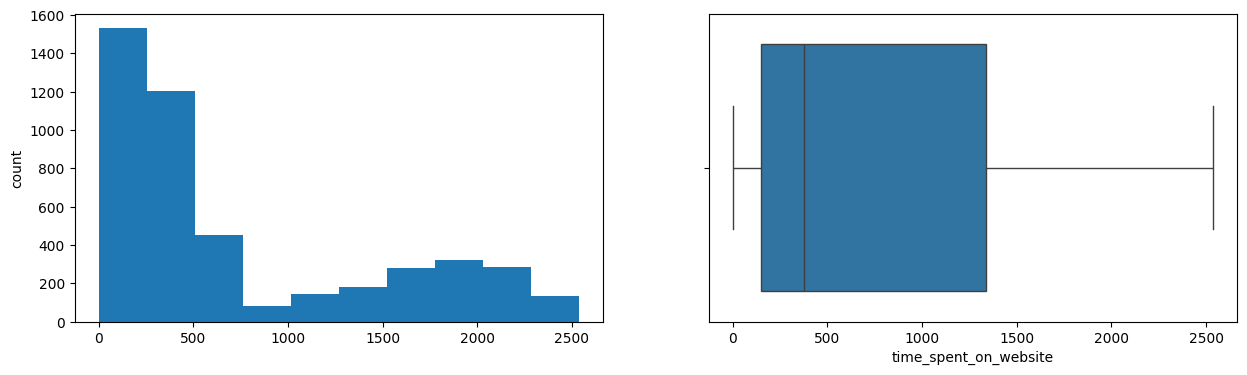

page_views_per_visit
Skew : 1.27


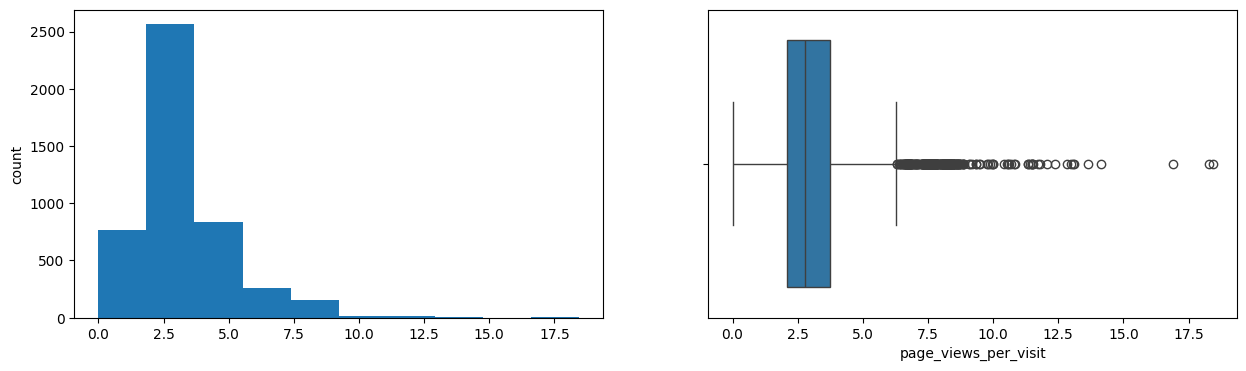

In [ ]:
for feature in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(feature)

    print('Skew :',round(df[feature].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[feature].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)

    sns.boxplot(x = df[feature])

    plt.show()

Observations:

age - The age of leads are left skewed with most with in the age range of 55-60. There are a uniform number of leads from 20-55 years old.

website_visits - Website visits are right skewed with many leads never having visited the website. There are a number of outliers past the 75th percentile of 7.5 website visits.

time_spent_on_website - Time spent on the web site is right skewed with many leads spending no time on the website. There seemes to be a second small normal distribution of leads
centered around 1750s. Indicating there are 2 groups of leads, one that spends little or no time on the website, and a second that uses the website as a primary source of information.

page_views_per_visit - Page views is right skewed with a majority of leads viewing 2-4 pages of the website. There are a number of outliers past the 75th percentile.

Distribution of categorical data



current_occupation


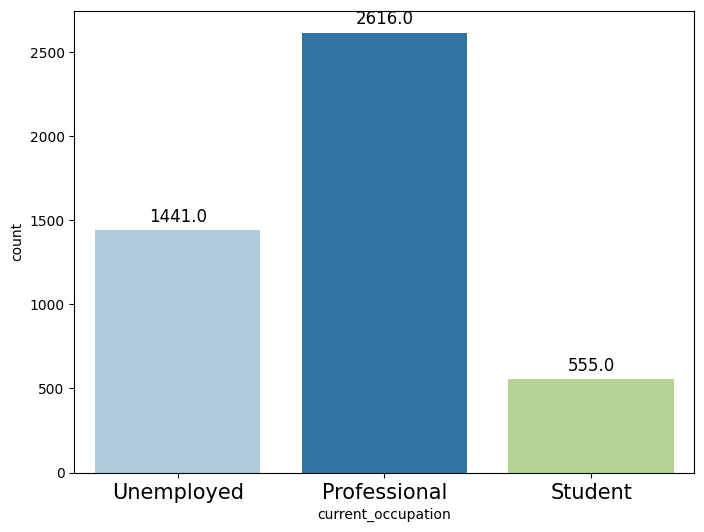

first_interaction


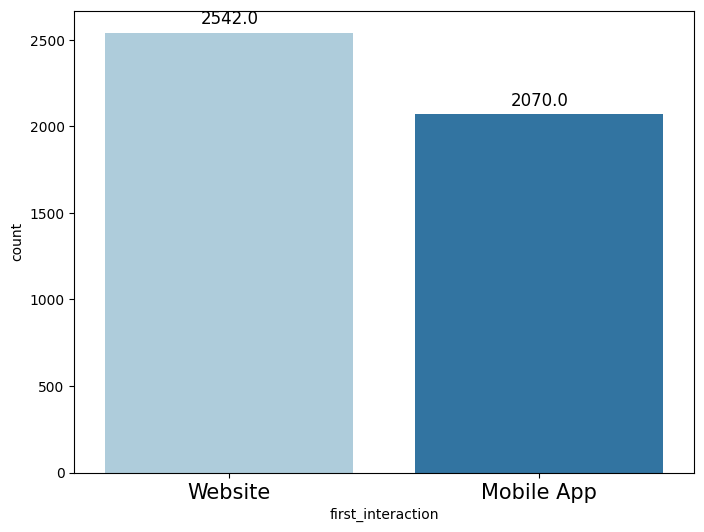

profile_completed


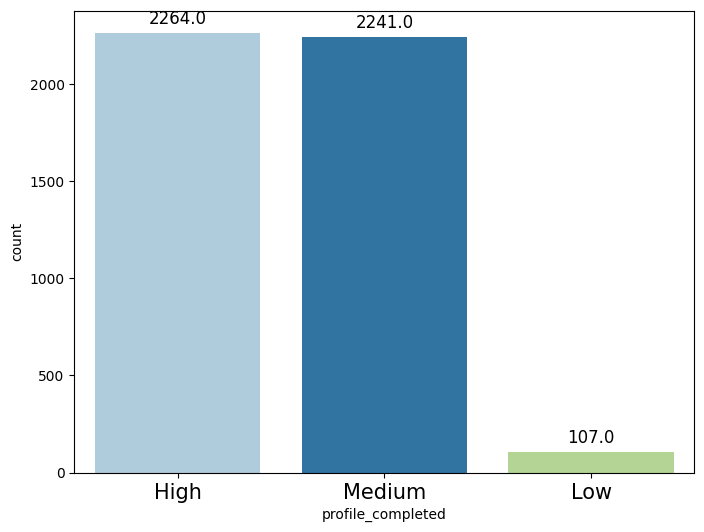

last_activity


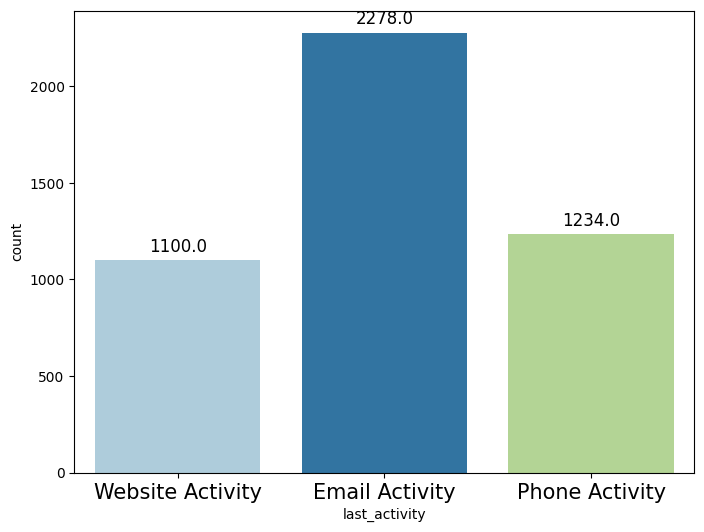

print_media_type1


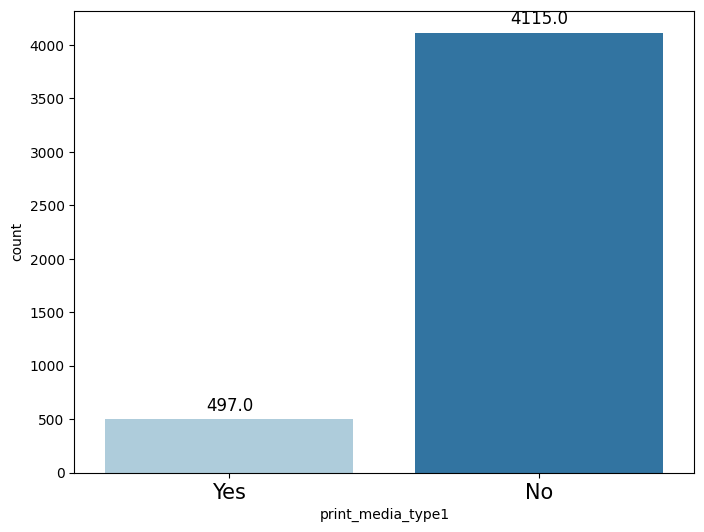

print_media_type2


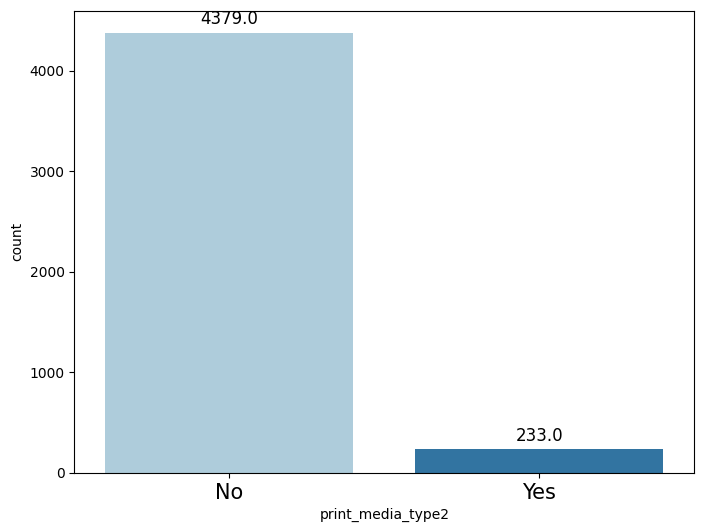

digital_media


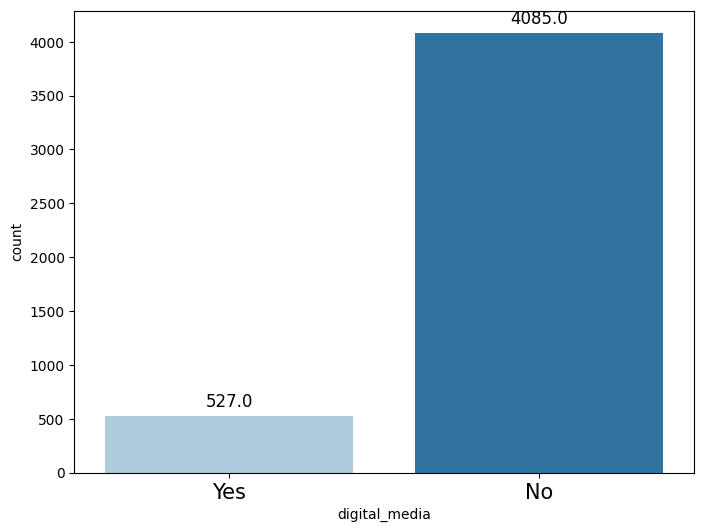

educational_channels


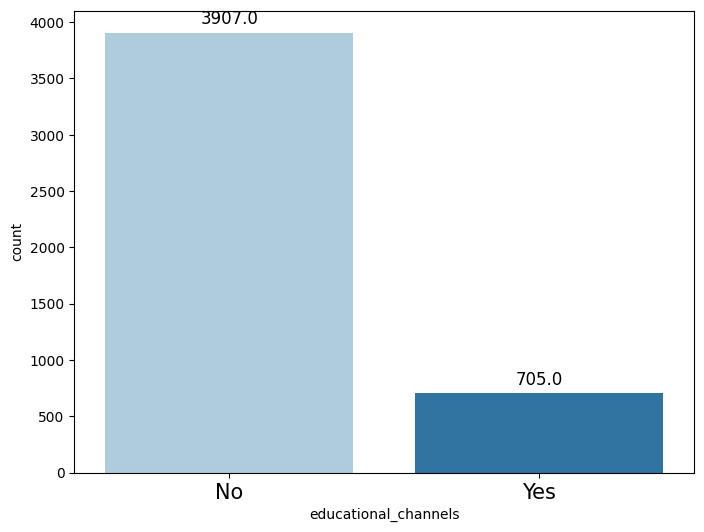

referral


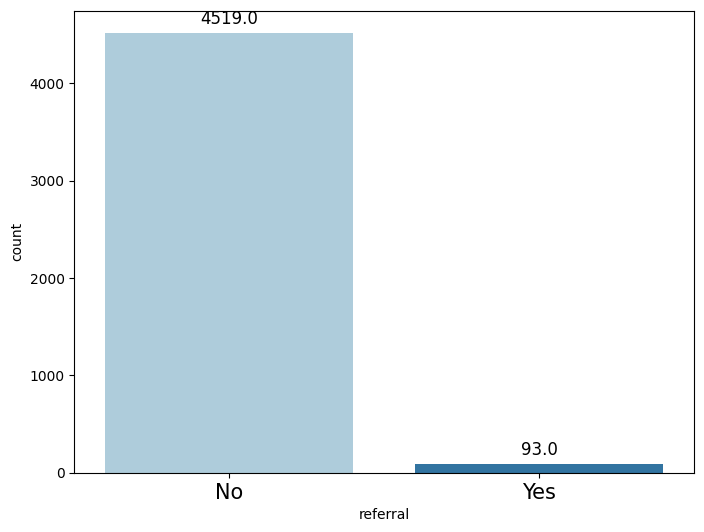

In [ ]:
for feature in ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral']:
    print(feature)

    plt.figure(figsize = (8, 6))
    total = len(data[feature])  # length of the column
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
            data=df,
            x=feature,
            palette="Paired",
            #order=data[feature].value_counts().index[:n].sort_values(),
        )

    for p in ax.patches:

            label = p.get_height()  # count of each level of the category

            x = p.get_x() + p.get_width() / 2  # width of the plot
            y = p.get_height()  # height of the plot

            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 10),
                textcoords="offset points",
            )  # annotate the percentage
    plt.xticks(rotation=0)
    plt.show()  # show the plot

Observations:

2616 leads are working professional.
First interaction media is website.
Most of the lead's first interaction was through the web, whereas last activity was with mobile app.

Maximum leads completed their profile highly and medium level.

Bivariate Analysis
Correlation heatmap

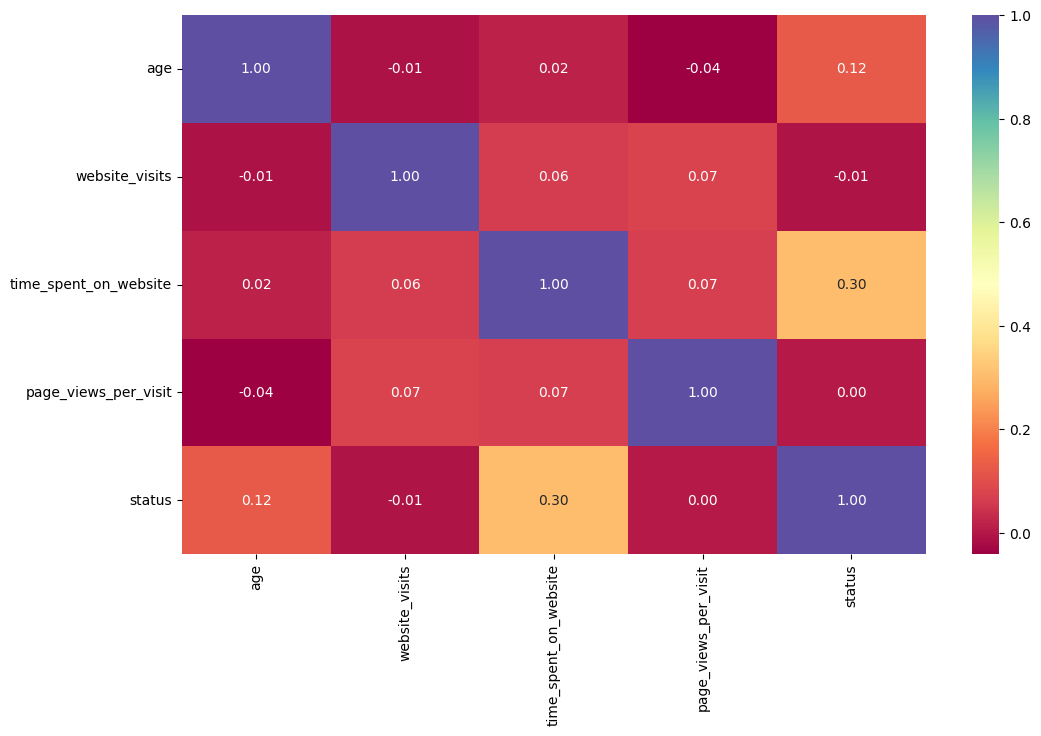

In [ ]:
numeric_df = df.select_dtypes(include='number') # Select columns with numeric data types

plt.figure(figsize = (12, 7))
sns.heatmap(numeric_df.corr(), annot = True, fmt = '.2f', cmap="Spectral")
plt.show()

Observations:

The highest correlation shown between time spent on website with status.

Slightly positive correlation with age as well.
There is negative or weak correlation between website visists and page view per visit with status,  indicating that those who spend a long time on the website are very interested to convert, whereas those who have repeat visits are uncertain.

Most other data  have a fairly neutral correlations.

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


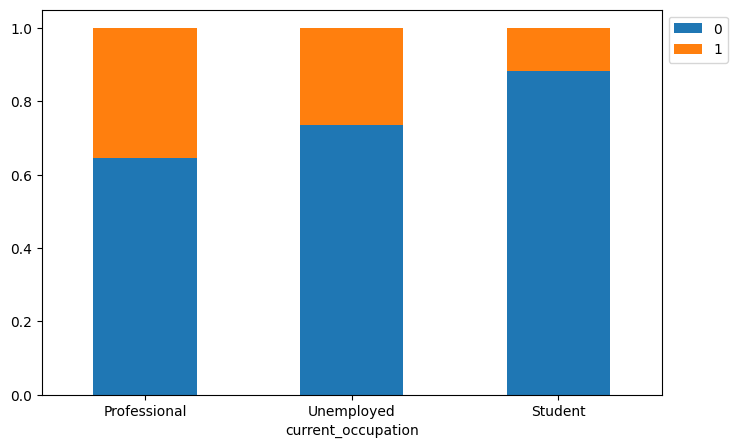

In [ ]:
stacked_barplot(df, "current_occupation", "status")

Observations:

Tha barplot shows that students are least likely to be converted.
ExtraaLearn might be more suitable for working professionals or currently unemployed leads.

Professionals are more interested in being converted rather than other two occupations, they want to learn more skills and are conscious about their career goals.

Age can be a good factor to differentiate between these leads

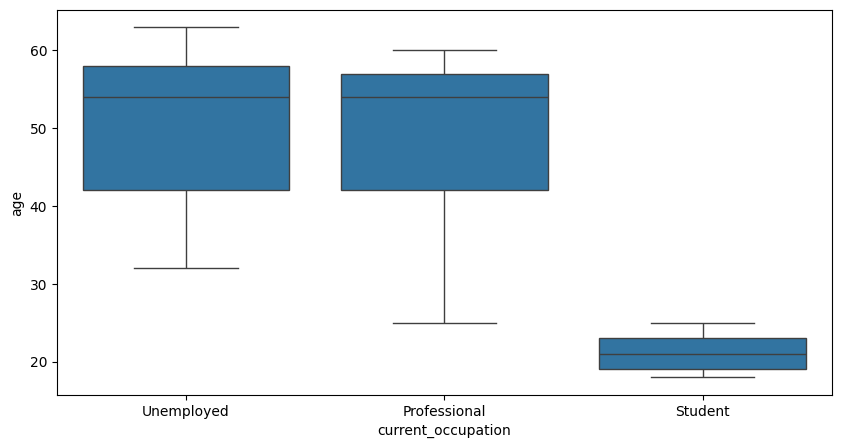

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="current_occupation", y="age", data=df)
plt.show()

In [ ]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


Observations:

Professionals age between 25 to 60 years

Students are within 18 to 25 years age

Age range of unemployeed leads is 32 to 63 years

The average age of working professionals and unemployed leads is almost 50 years.

The company's first interaction with leads is the targe.  Let's observe if the channels of the first interaction have an impact on the conversion of leads

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


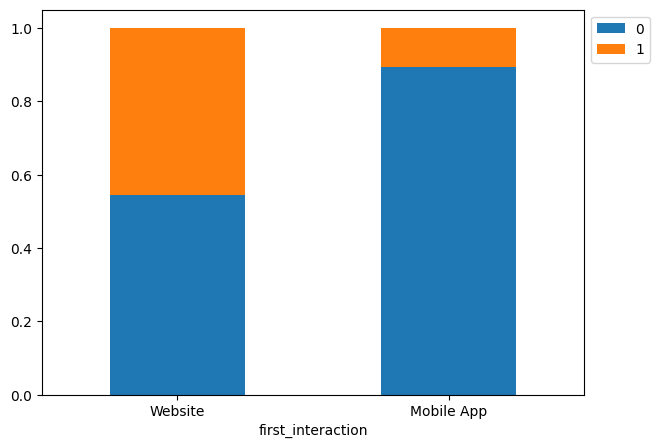

In [ ]:
stacked_barplot(df,"first_interaction", "status") # Stacked_barplot for first_interaction and status


Observations:

Highest number of leads have been converted to paid customers who first interact with Website rather than who interact with mobile app

lets analyze the distribution of time spent on the website



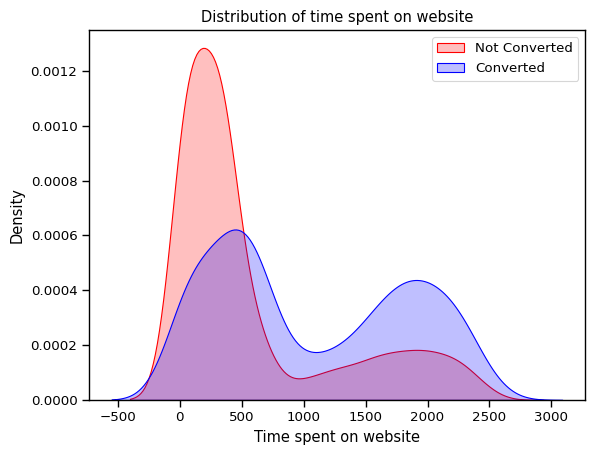

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.time_spent_on_website[(df["status"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.time_spent_on_website[(df["status"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Converted","Converted"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Time spent on website');
ax.set_title('Distribution of time spent on website');

Observations:

 leads spend more time on website are also more likely to converted to paid customer

similar analysis for page views per visit

Text(0.5, 1.0, 'Distribution of page views per visit')

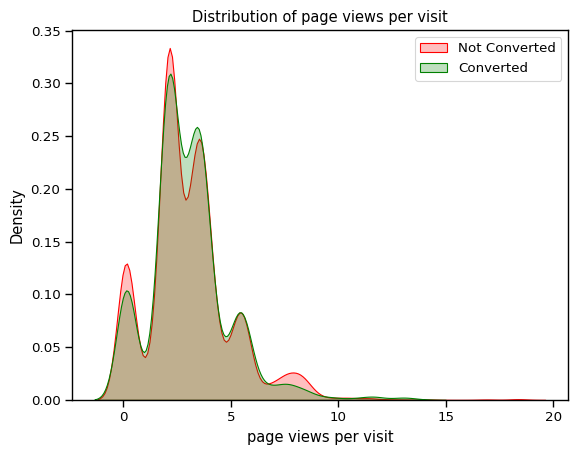

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.page_views_per_visit[(df["status"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.page_views_per_visit[(df["status"] == 1) ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Converted","Converted"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('page views per visit');
ax.set_title('Distribution of page views per visit')

Observations: There is no major impact of the number of page view on status.

how  last activity impacts lead conversion status?

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


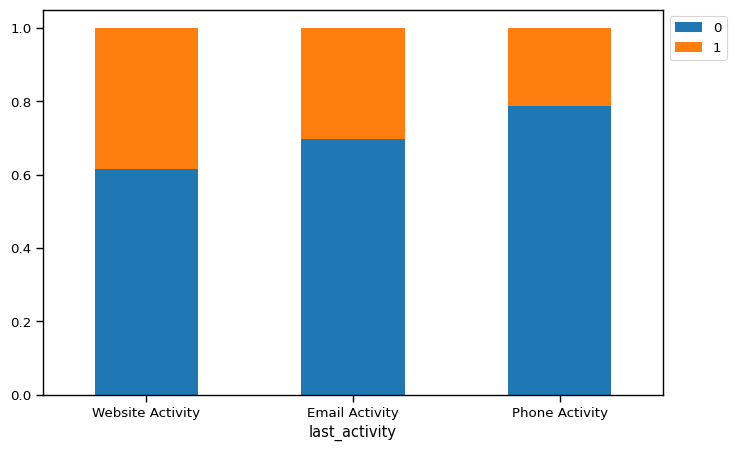

In [ ]:
stacked_barplot(df,"last_activity", "status")  # plot stacked_barplot for  last_activity and status

Observations:

Leads who are active on website have higher rate of conversion.
Those are active thorough email have median rate of conversion.
Very few conversion rate of leads who are using phone.

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


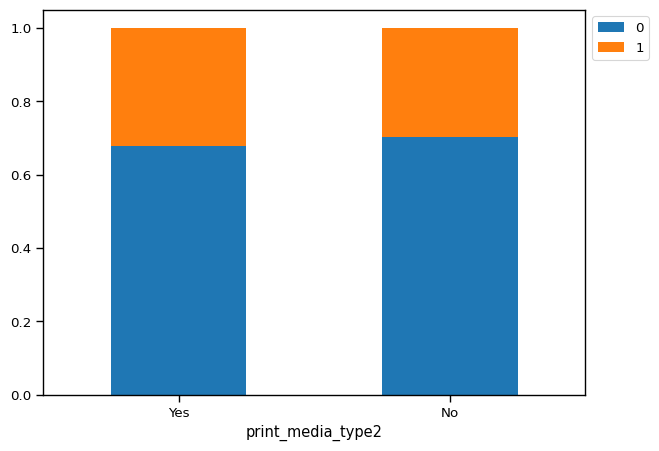

In [ ]:
# plot stacked_barplot for print_media_type2 and status
stacked_barplot(df,"print_media_type2", "status")

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


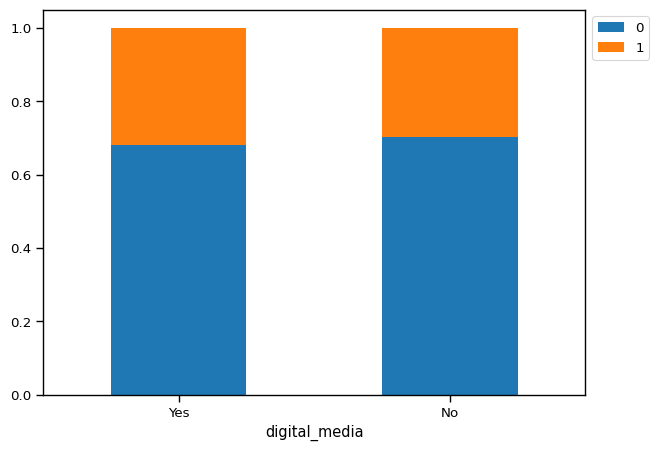

In [ ]:
# plot stacked_barplot for digital_media and status
stacked_barplot(df,"digital_media", "status")

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


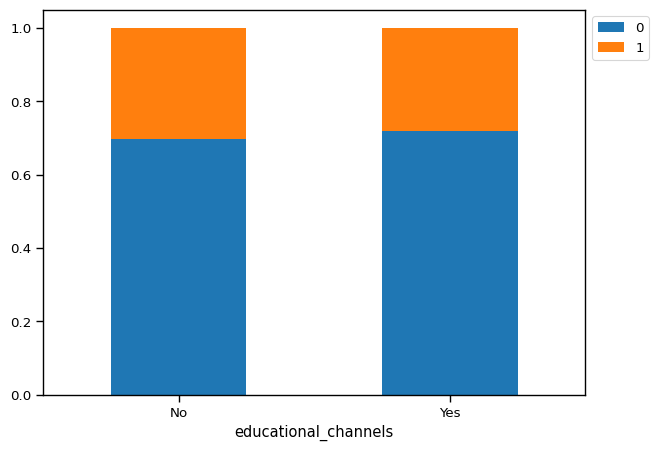

In [ ]:
#to plot stacked_barplot for educational_channels and status
stacked_barplot(df,"educational_channels", "status")

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


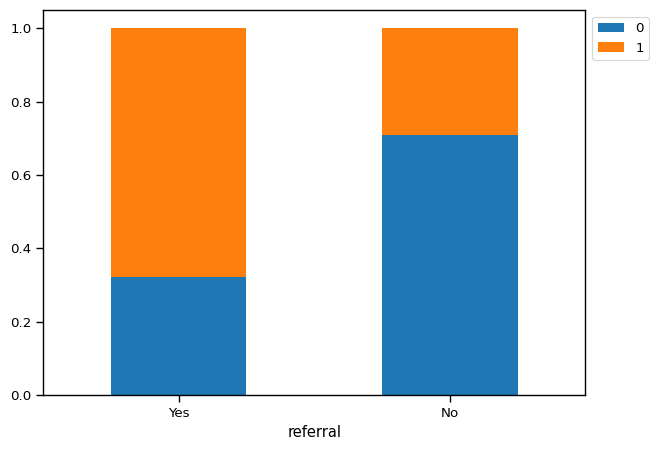

In [ ]:
# code to plot stacked_barplot for referral and status
stacked_barplot(df,"referral", "status")

Observations:

leads who had seen the ad of ExtraaLearn in the Newspaper, Magazine, digital media and educational_channels have no such difference on convertion or not. lead by references have highest rate of conversion to paid customer.

People browsing the website or the mobile app are generally required to create a profile by sharing their details before they can access more information. Let's see if the profile completion level has an impact on lead coversion

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


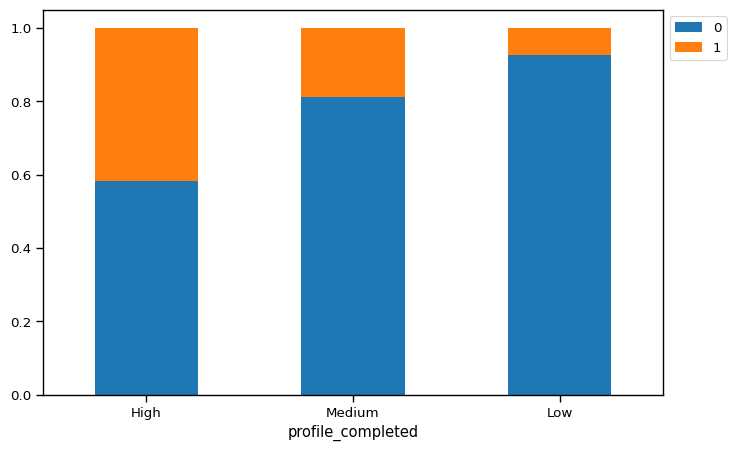

In [ ]:
stacked_barplot(df,"profile_completed", "status")  # plot stacked_barplot for profile_completed and status

Observations:

Highest number of leads completed their profile converted to paid customer.
The medium and low levels of profile completion observed in comparison with less conversions.

Data Processing and Outlier Decection

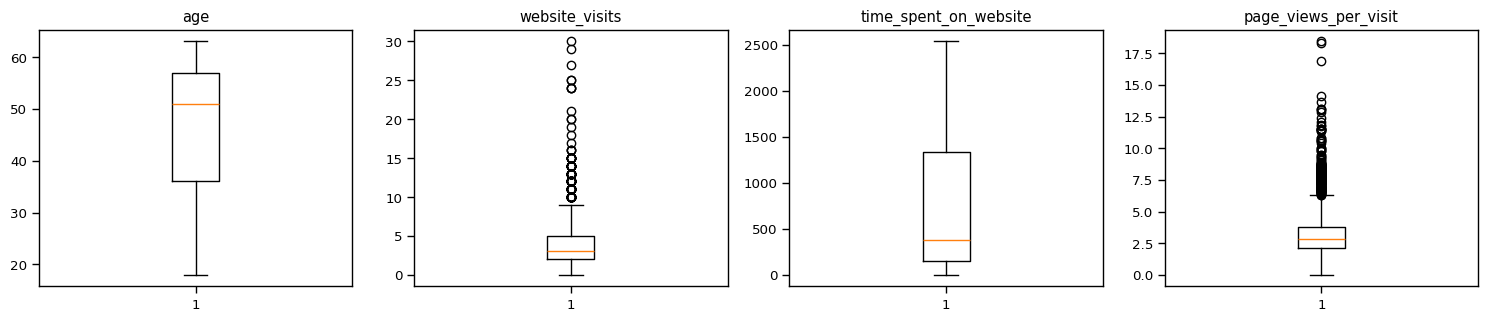

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

From the plots, there are outliers showing in website_visit and page_views_per_visit plots.
In website visit feature outlier points shows between 10 to 30 and in the page view per visit feature there are outliers in between 6 to 20.

Data Preparation for modeling


In [ ]:
# Separating the target variable and independent variables
X = df.drop(columns = 'status') #make a copy called X which is a dataframe with "booking_status" removed

Y = df['status'] #Y is a series (column) containing the "booking_status"
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

#pd.get_dummies => working on X dataframe converts all cathegorical variables into binary 1/0 yes/no.
# Check the data after handling categorical data
X

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.914,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,False,True,False,False,True,True,False,False,False,False,True,False
4608,55,8,2327,5.393,False,False,False,False,True,False,False,False,False,False,False,False
4609,58,2,212,2.692,False,False,True,False,False,False,False,False,False,False,False,False
4610,57,1,154,3.879,False,False,False,False,True,False,True,True,False,False,False,False


In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [ ]:
print("Shape of the training set: ", X_train.shape)
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
status
0    0.704151
1    0.295849
Name: proportion, dtype: float64
Percentage of classes in the test set:
status
0    0.695087
1    0.304913
Name: proportion, dtype: float64


Building Classification Models
Created a function to avoid repetitive coding of classification report and confusion matrix for each model.

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [ ]:
# Fitting the decision tree classifier on the training data
dt =  DecisionTreeClassifier(random_state =7)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



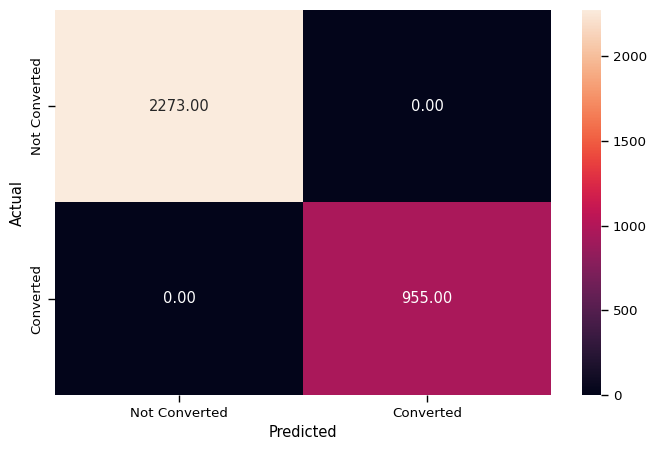

In [ ]:
# Checking performance on the training data
y_pred_train1 = dt.predict(X_train)
metrics_score(y_train, y_pred_train1)

Observations:

There is no error on the training set,
The model is perfectly fit on the training data, it is likely overfitted.

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



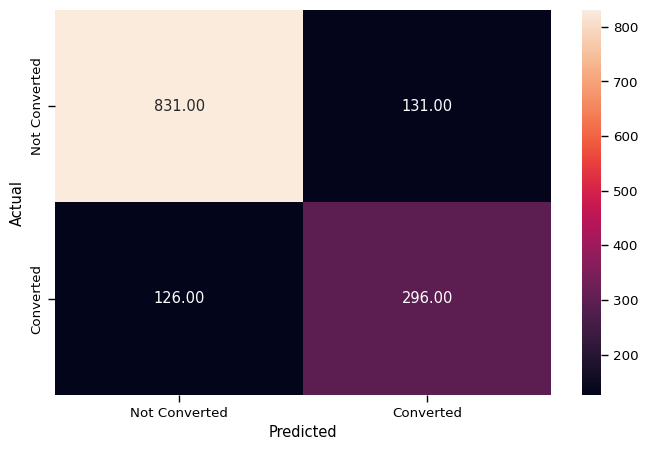

In [ ]:
# Checking performance on the testing data
y_pred_test1 = dt.predict(X_test)
metrics_score(y_test, y_pred_test1)

Observations:

The decision tree model is overfitting the training data as expected and is not able to generalize well on the test set. It is overfitted.
The model is predicting equally on recall(70%) and precision(69%), I would like to prioritize increasing recall (minimizing false negatives).
Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth to reduce overfitting of the model.

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



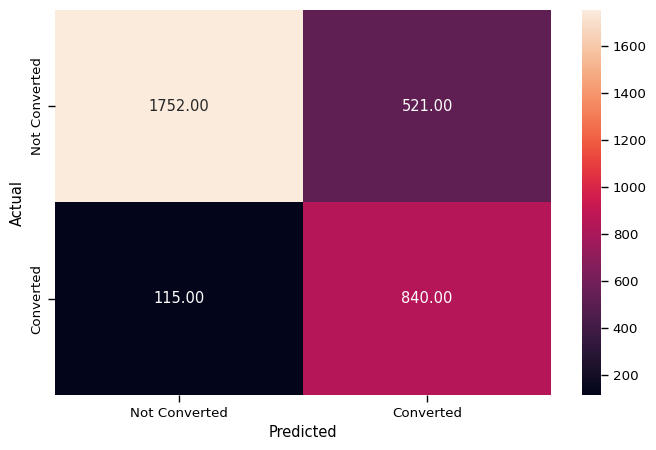

In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train,y_pred_train2)

Observations:
 the performance on the training data has decreased which can be expected as we are trying not to overfit the training dataset.
The model can able to identify the Lead to be converted.

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



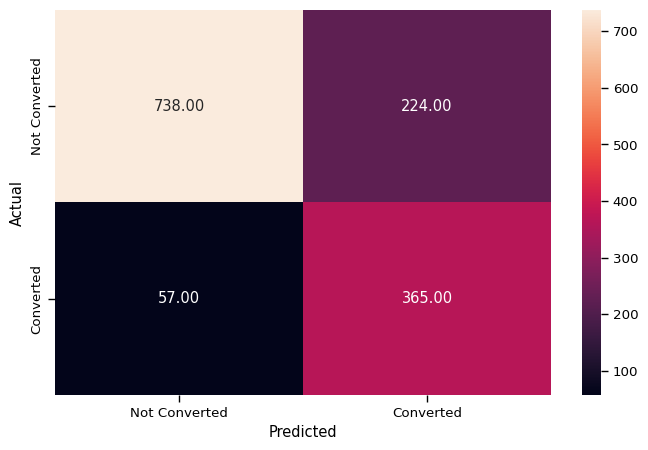

In [ ]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test,y_pred_test2)

Observations:

It is observable that the recall for class 1 has increased to 86% but the precision has decreased.
The overfitting has reduced significantly and now the model is performing more generlized on both training and testing data.

Building the Decision Tree

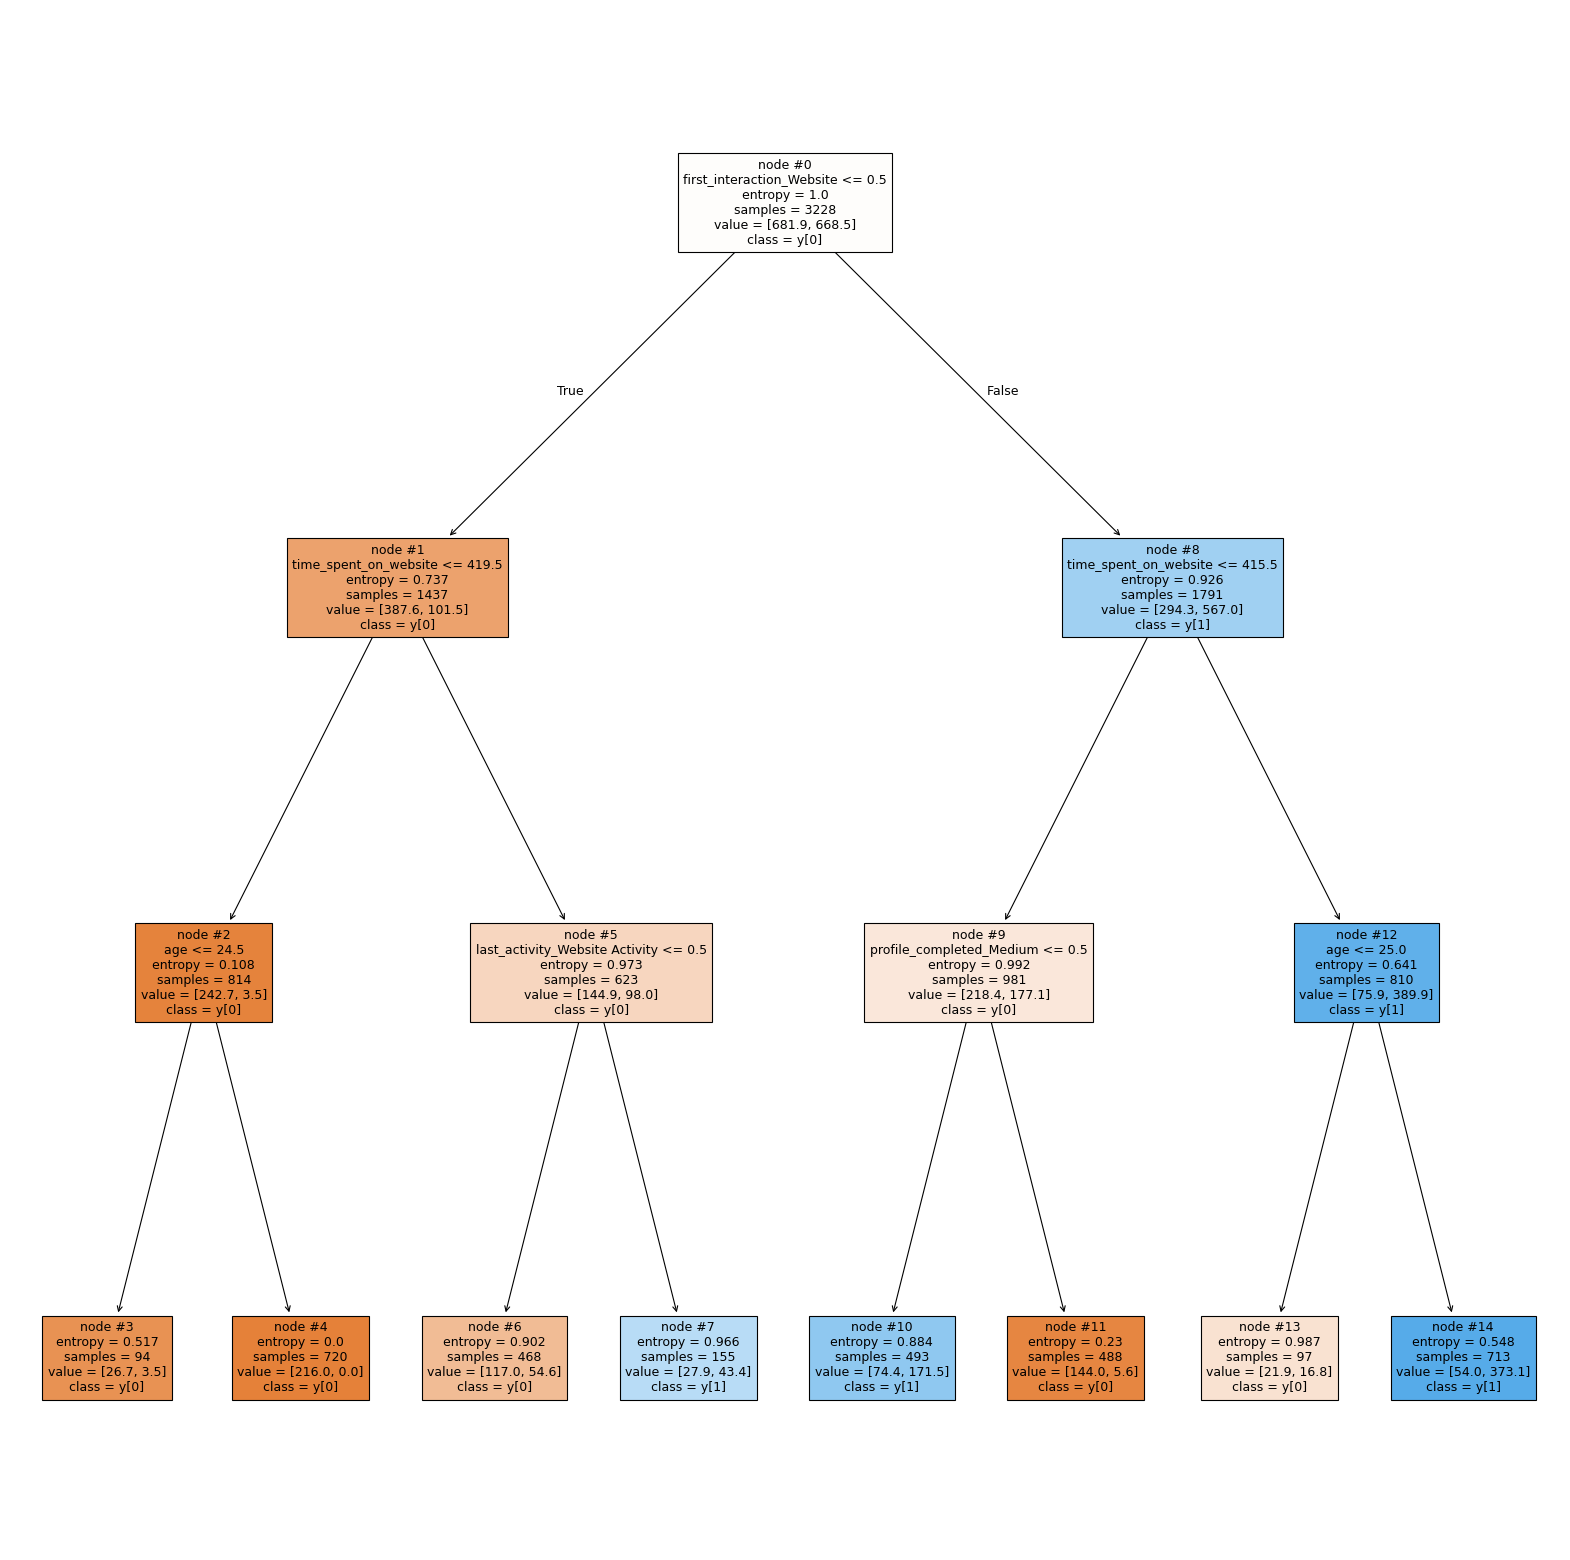

In [ ]:
features = list(X.columns)
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

In [ ]:
print(tree.export_text(d_tree_tuned, feature_names=features, show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 24.50
|   |   |   |--- weights: [26.70, 3.50] class: 0
|   |   |--- age >  24.50
|   |   |   |--- weights: [216.00, 0.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [117.00, 54.60] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [27.90, 43.40] class: 1
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 415.50
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- weights: [74.40, 171.50] class: 1
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [144.00, 5.60] class: 0
|   |--- time_spent_on_website >  415.50
|   |   |--- age <= 25.00
|   |   |   |--- weights: [21.90, 16.80] class: 0
|   |   |--- age >  25.00
|   |   |   |--- weights: [54.00, 373.10] class: 1



Observations:
Observations:

First split in the decision tree is at first_interaction which implies it is one of the most important features.
Leads who first interacted with the website has a much higher conversion rate than the mobile app.
Second split is mad on time_spent_on_website (highlighted in correlation heatmap). Leads who spend more time on the website have a higher likelyhood of converting.
Next age seems to be the next significant factor. Leads who are older than 25 years have a higher likelyhood of converting.

In [ ]:
# Importance of features in the tree building

print(pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


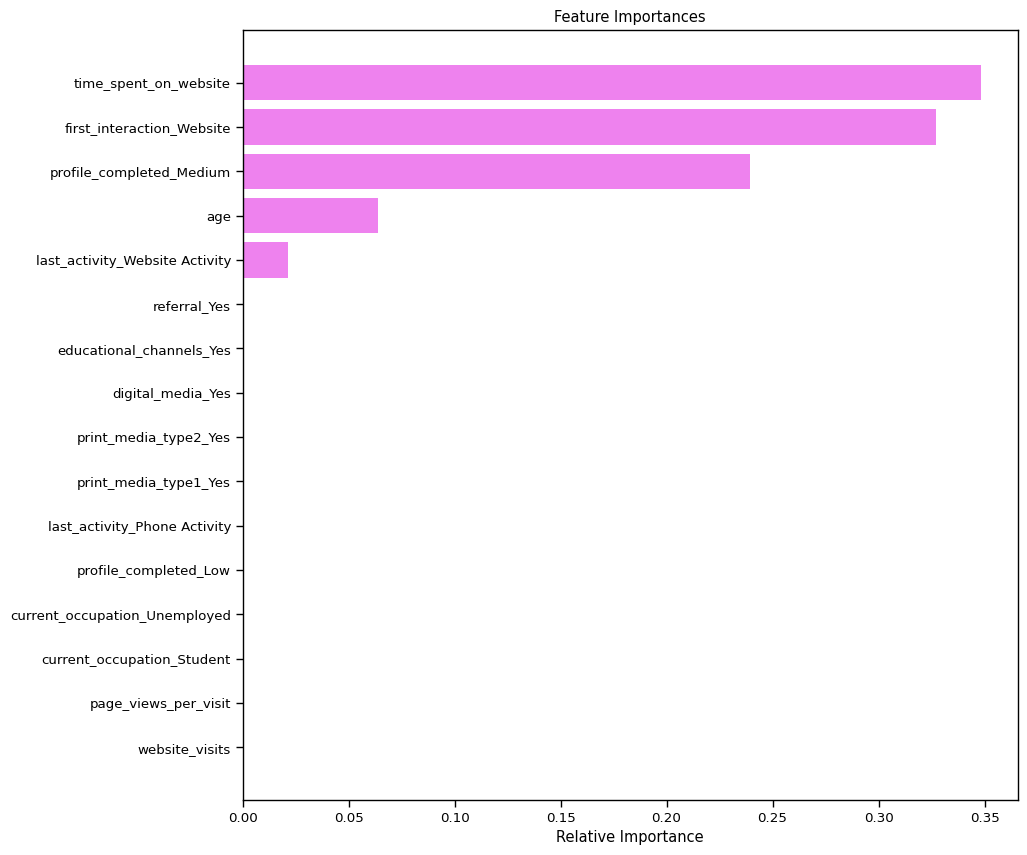

In [ ]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Observations:

Time spent on the website, first_interaction_website and profile_completed are the most important features followed by age, and _last_activity_Website Activity.
The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not.


## Building a Random Forest model

Building model

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=7,criterion="entropy")
rf_estimator.fit(X_train,y_train)
RandomForestClassifier(criterion='entropy', random_state=7)

RandomForestClassifier(criterion='entropy', random_state=7)

## Do we need to prune the tree?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



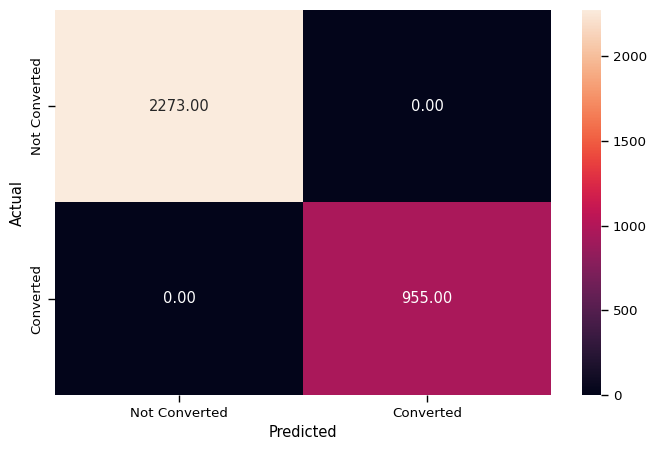

In [ ]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train,y_pred_train3)


Observations:

Similar to the decision tree classifier, the random forest is generating almost perfect performance on the training data.

The model is most likely overfitting.

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



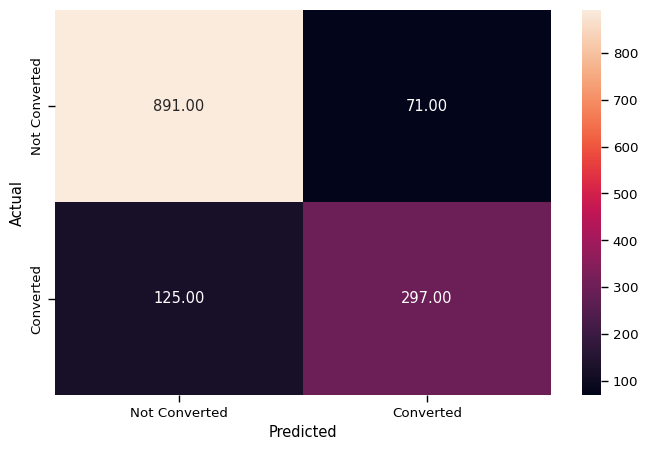

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

KeyboardInterrupt: 

In [ ]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

In [ ]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

In [ ]:
# Checking performance on the testing data
y_pred_test4 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test4)

Observations:

After hyperparameter tuning, the model score was decreased on training data.
The precision continues to be higher than the recall.


In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

In [ ]:
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

In [ ]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train5)

In [ ]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test5)

Observations:

Though the accuracy of the tunned model is slightly decressed, the model is no longer overfitted with a testing f1-score of 76%, meaning it will generalize well. Recall is higher than the precision of 68% on both train and test data. This is inline with the goals of reducing false negatives.

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize = (12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')


plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


## Actionable Insights and Recommendations



Similar to the decision tree model, time spent on website, first_interaction_website, profile_completed, and age are the top four features that help distinguish between convertion and not convertion of leads.
Unlike the decision tree, the random forest gives some importance to other variables like occupation, page_views_per_visit, as well. This implies that the random forest is giving importance to more factors in comparison to the decision tree.

Conclusion:
Building tree-based models that can be used by the ExtraaLearn to predict which leads are likely to be converted to paid customer and know the important marketing policies accordingly.

After data preprocessing, visualization on the decision tree classifier has been performed and interpreted the output.

Also measured the performance on the train and test sets to find the optimal value for the hyperparameter max_depth, which came out to be 3.

It is observed that Random Forest gives more generalized results than a single decision tree for the sample value of max_depth. The optimal max_depth for Random Forest came out to be 6.

Two models performed execellent:

Tuned Model - f1-score 72% and recall 86%
Hyper Tuned Random Forest Model - f1-score 76% and recall 85%
Main objective of minimizing false negatives and maximizing recall has been achieved. Losing a convertible lead can be more expensive than wasting resources on a non-convertible one. Although both scenarios are acceptable, wasting resources is still a crucial factor. Therefore, it is recommended to use the Hyper Tuned Random Forest Model, which has shown an overall improvement of 4%, though recall loss of only 1%.